In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings(action = 'ignore')
#plt.style.use(['seaborn-bright', 'dark_background'])

In [29]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [30]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [31]:
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [32]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split as tts 
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify= Y )
x_train.shape, x_test.shape, y_train.shape , y_test.shape


((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building , Predictions and odds ratio


In [34]:
from sklearn.linear_model import LogisticRegression as LR
Classifier = LR(class_weight = 'balanced')


In [35]:
Classifier.fit(x_train, y_train)
predicted_values = Classifier.predict(x_test)               #predicting class
predicted_probabilities = Classifier.predict_proba(x_test) #predicting probabilities 

In [36]:
predicted_values

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [37]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.58221527, 0.41778473],
        [0.48322791, 0.51677209],
        [0.42466778, 0.57533222],
        ...,
        [0.51852486, 0.48147514],
        [0.44953308, 0.55046692],
        [0.7002357 , 0.2997643 ]]),
 (4414, 2))

In [38]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2589,  970],
       [ 285,  570]], dtype=int64)

In [39]:
Classifier.score(x_test, y_test)

0.715677390122338

In [40]:
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision 

0.37012987012987014

In [41]:
from sklearn.metrics import recall_score
Recall= recall_score(y_test, predicted_values)
Recall

0.6666666666666666

In [42]:
f1 = 2/((1/Precision)+(1/Recall))
f1

0.47599164926931103

In [43]:
from sklearn.metrics import classification_report 
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      3559
           1       0.37      0.67      0.48       855

    accuracy                           0.72      4414
   macro avg       0.64      0.70      0.64      4414
weighted avg       0.80      0.72      0.74      4414



In [44]:
from sklearn.tree import DecisionTreeClassifier as DTC 
Classifier = DTC(class_weight = 'balanced')
Classifier = DTC()

In [45]:
Classifier.fit(x_train, y_train)
predicted_values = Classifier.predict(x_train)

In [46]:
predicted_values[:30]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

# Evaluation Metrics

In [47]:
from sklearn.metrics import classification_report 
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [48]:
predicted_values = Classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3559
           1       0.44      0.47      0.46       855

    accuracy                           0.78      4414
   macro avg       0.65      0.66      0.66      4414
weighted avg       0.79      0.78      0.78      4414



# Visualizing Decision Tree

In [49]:
!pip install graphviz 

In [50]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = Classifier, out_file = 'tree_viz',
               max_depth= None, feature_names = X.columns, 
               label = None, impurity = False)

In [51]:
from graphviz import render 
render( filepath='tree_viz', format='png', engine='neato')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Hyperparameter Tuning 

In [52]:
from sklearn.tree import DecisionTreeClassifier as DTC 
Classifier = DTC(class_weight = 'balanced')
Classifier = DTC()

In [53]:
Classifier.fit(x_train, y_train)
predicted_values = Classifier.predict(x_train)

In [54]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
Classifier= DTC()
Classifier.fit(x_train, y_train)
Classifier.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [72]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1,y1)
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    
    return f1, f2

In [73]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (5,5), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red' , label = 'train_score')
    plt.plot(x_axis, test_score, color = 'blue' , label = 'test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1 score")
    plt.show()

In [74]:
maxdepth = [ i for i in range(1,50)]
train = []
test = []

for i in maxdepth:
    model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
    f1,f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

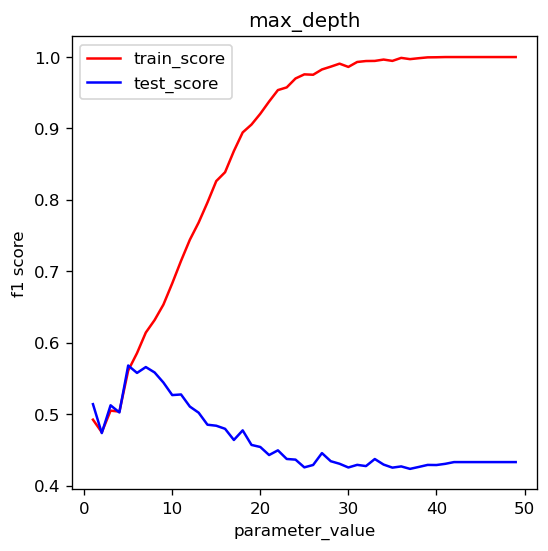

In [75]:
effect(train, test, range(1,50), 'max_depth')

# min_samples_split

In [76]:
min_samples = [ i for i in range(2,5000,25)]
train = []
test = []

for i in min_samples:
    model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
    f1,f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

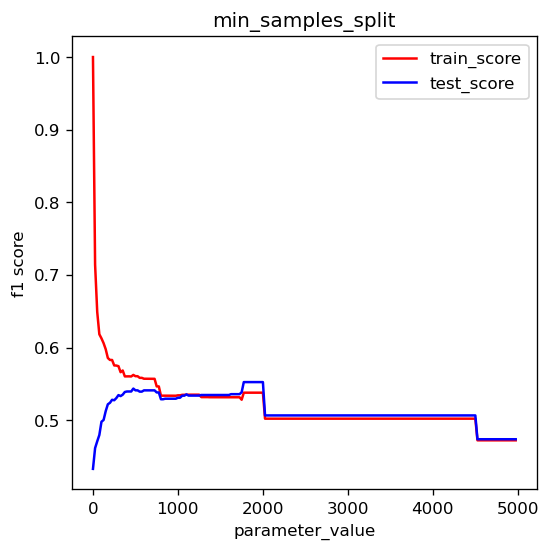

In [77]:
effect(train, test, range(2,5000,25), 'min_samples_split')

# max_leaf_nodes

In [78]:
maxleafnodes = [ i for i in range(2,200,10)]
train = []
test = []

for i in maxleafnodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes= i, random_state = 42)
    f1,f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

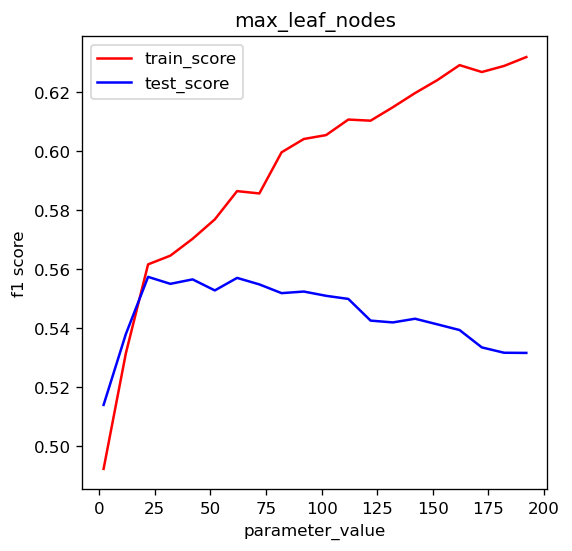

In [79]:
effect(train, test, range(2,200,10), 'max_leaf_nodes')

# min_samples_leaf 

In [65]:
minsamplesleaf = [ i for i in range(2,4000,25)]
train = []
test = []

for i in minsamplesleaf:
    model = DTC(class_weight = 'balanced', min_samples_leaf= i, random_state = 42)
    f1,f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

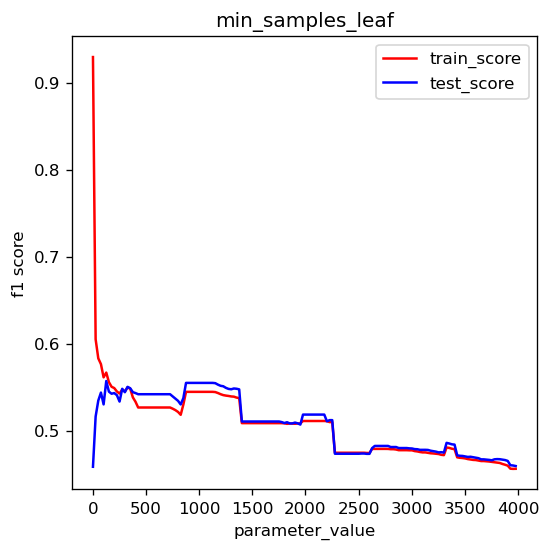

In [66]:
effect(train, test, range(2,4000,25), 'min_samples_leaf')

In [86]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DTC 
model = DTC(max_depth = 9)
model.fit(x_train, y_train)
feature_imp = pd.series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

AttributeError: module 'pandas' has no attribute 'series'

TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

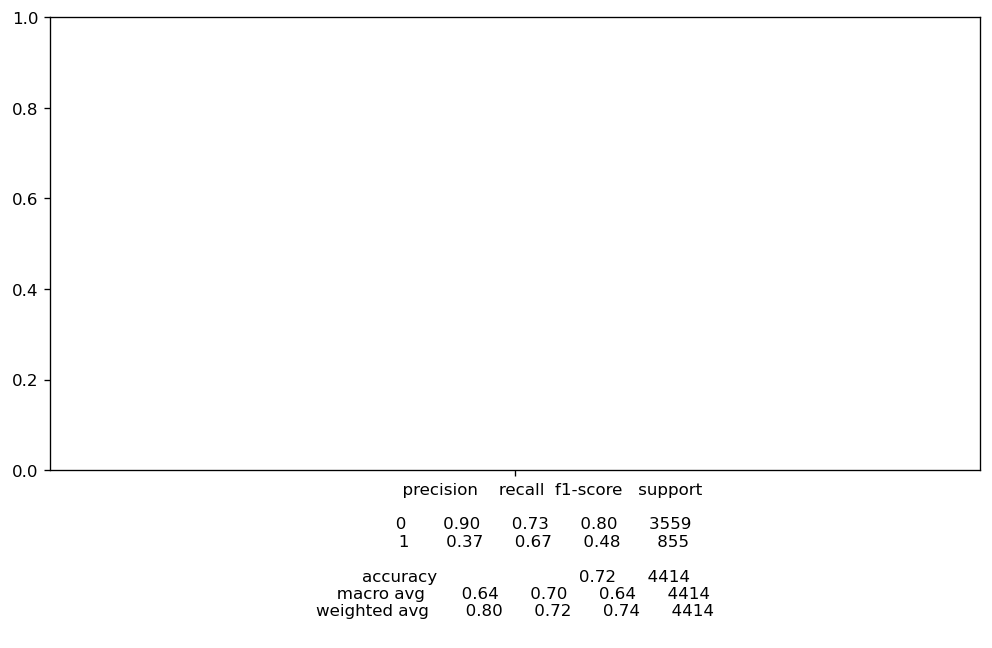

In [82]:
plt.figure(figsize= (10,5), dpi = 120)
plt.barh(k.index, k)
plt.xlabel('Importance')
plt.ylabel('feature_name')
plt.title('feature importance')